<a href="https://colab.research.google.com/github/saqibkaka/PRODIGY_DS_TASK/blob/main/PRODIGY_DS_TASK_03/Bank_Marketing_DecisionTree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [6]:
data = '/content/bank.csv'
df = pd.read_csv(data)

In [8]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [16]:
c = df.columns
c

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [54]:
x = df.drop(['deposit'] , axis=1 )
y = df['deposit']

In [19]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [11]:
df.duplicated().sum()

0

In [21]:
df.shape

(11162, 17)

In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [24]:
df['month'].value_counts()

,count
month,
may,2824
aug,1519
jul,1514
jun,1222
nov,943
apr,923
feb,776
oct,392
jan,344


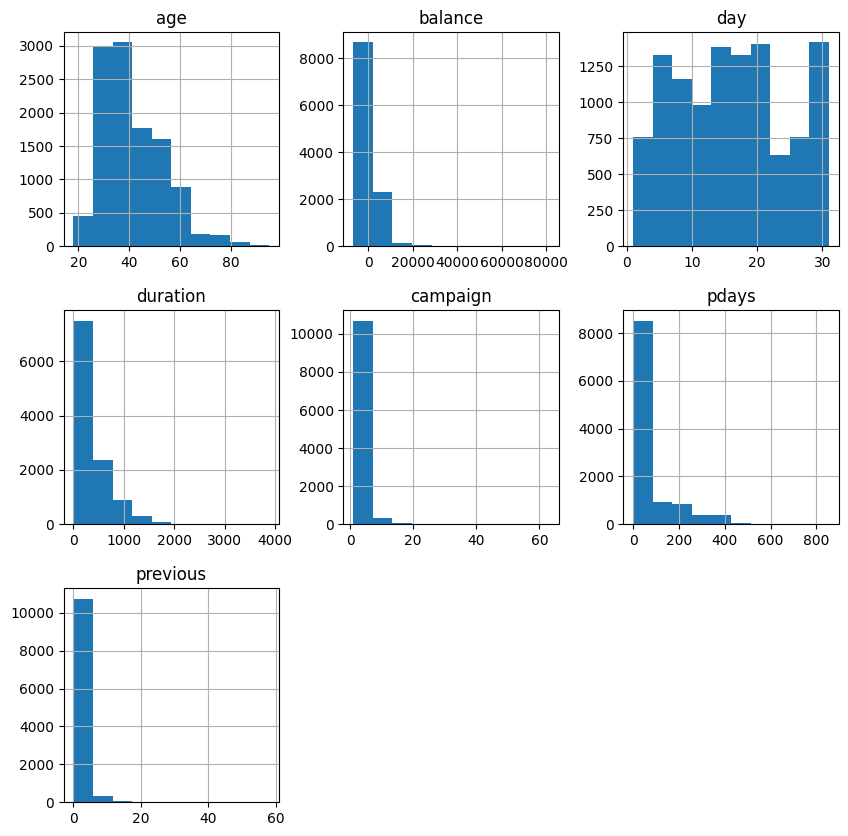

In [43]:
df.hist(figsize=(10, 10))
plt.show()

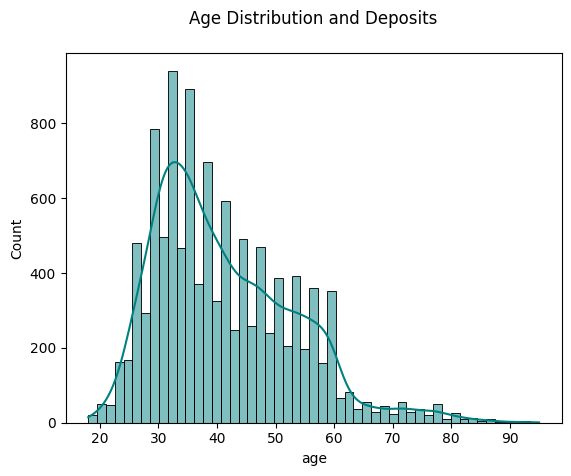

In [52]:
sns.histplot(x="age", data=df, kde=True, color='teal')
plt.title("Age Distribution and Deposits\n")
plt.show()


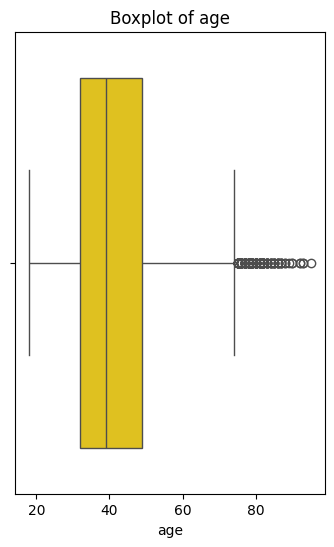

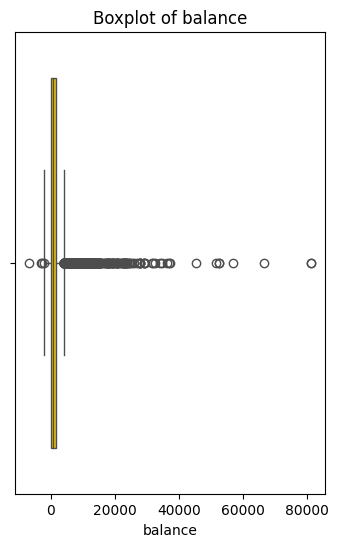

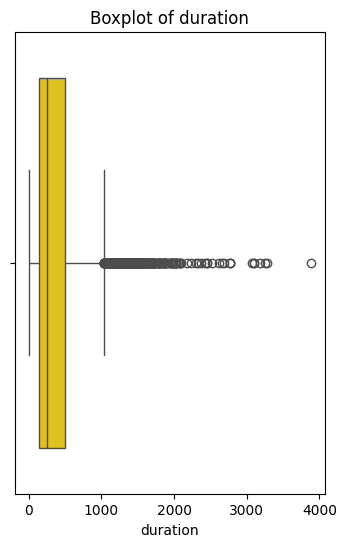

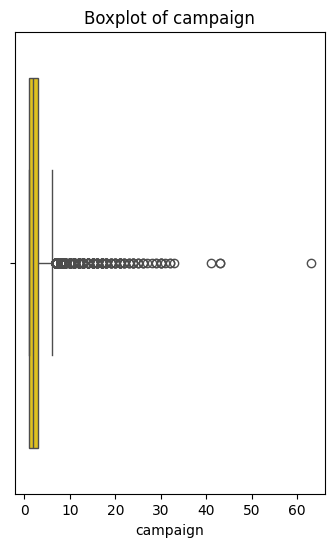

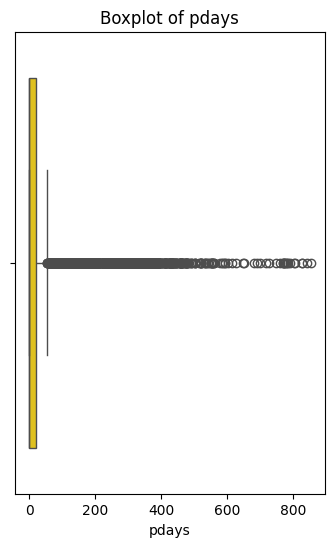

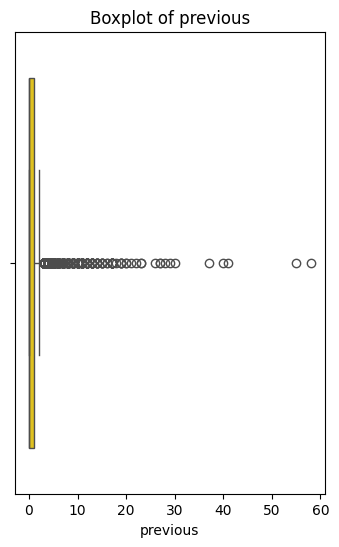

In [29]:
# Assuming you have identified numerical features in your dataset and stored them in 'num_cols' list
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for feature in num_cols:
    plt.figure(figsize=(4, 6))  # Adjust the figure size as per your preference
    sns.boxplot(x=feature, data=df, color='gold')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


In [32]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers from the dataset
cleaned_data = remove_outliers(df, num_cols)
# Check the shape of the cleaned dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", cleaned_data.shape)

Original dataset shape: (11162, 17)
Cleaned dataset shape: (6557, 17)


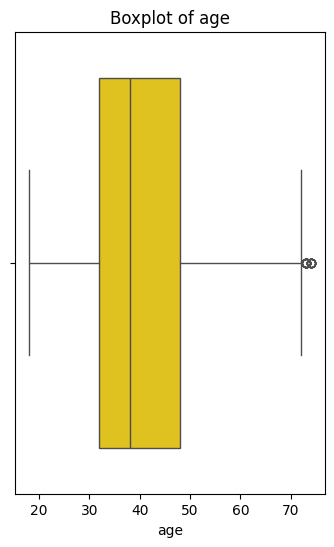

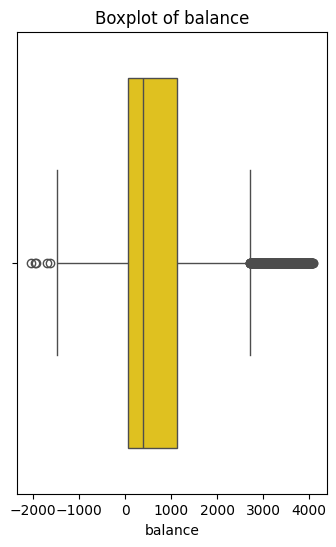

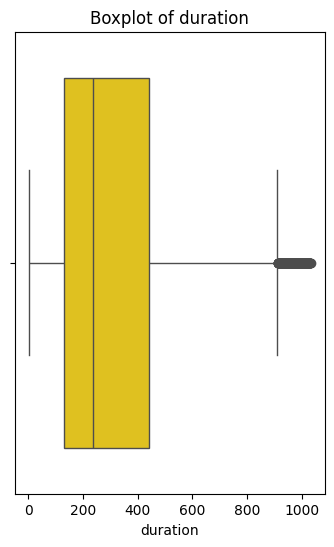

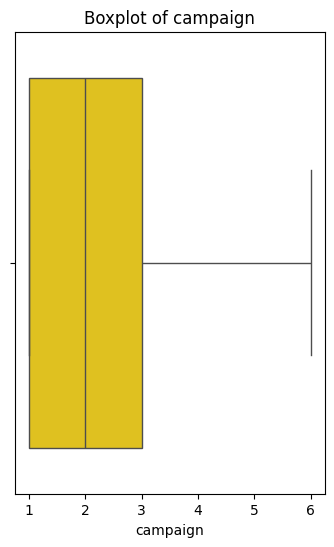

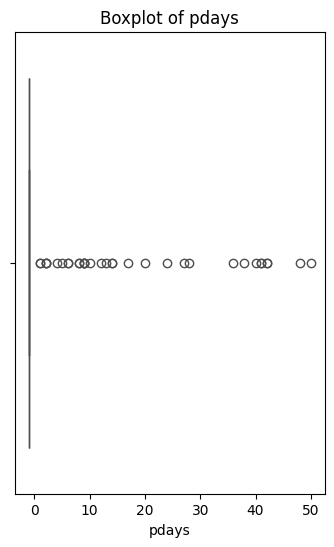

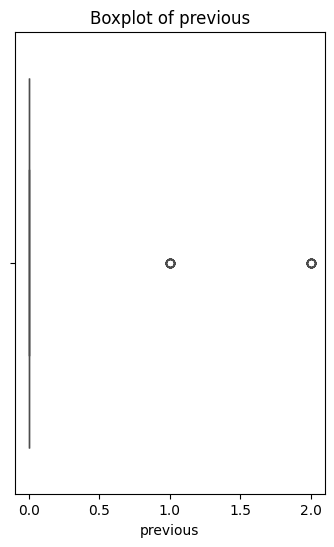

In [33]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for feature in num_cols:
    plt.figure(figsize=(4, 6))  # Adjust the figure size as per your preference
    sns.boxplot(x=feature, data=cleaned_data, color='gold')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [61]:
df=df.drop(columns=['poutcome','contact','previous','pdays','duration','month','day'])
df.head()


,age,job,marital,education,default,balance,housing,loan,campaign,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1,yes
1,56,admin.,married,secondary,no,45,no,no,1,yes
2,41,technician,married,secondary,no,1270,yes,no,1,yes
3,55,services,married,secondary,no,2476,yes,no,1,yes
4,54,admin.,married,tertiary,no,184,no,no,2,yes


In [62]:
df.shape

(11162, 10)

In [63]:
df.duplicated().sum()

312

In [64]:
df=df.drop_duplicates()
df.shape

(10850, 10)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10850 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10850 non-null  int64 
 1   job        10850 non-null  object
 2   marital    10850 non-null  object
 3   education  10850 non-null  object
 4   default    10850 non-null  object
 5   balance    10850 non-null  int64 
 6   housing    10850 non-null  object
 7   loan       10850 non-null  object
 8   campaign   10850 non-null  int64 
 9   deposit    10850 non-null  object
dtypes: int64(3), object(7)
memory usage: 932.4+ KB


In [66]:
df_object=df.select_dtypes(include=["object"])

In [68]:
le=LabelEncoder()
for columns in df_object:
    df[columns]=le.fit_transform(df[columns])

In [69]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,campaign,deposit
count,10850.000000,10850.000000,10850.000000,10850.000000,10850.000000,10850.000000,10850.000000,10850.000000,10850.000000,10850.000000
mean,41.179631,4.476774,1.196959,1.280922,0.015484,1514.779908,0.480737,0.133825,2.543410,0.460922
std,11.827963,3.228089,0.626488,0.750442,0.123473,3134.642274,0.499652,0.340480,2.750947,0.498494
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,119.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,547.000000,0.000000,0.000000,2.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1702.750000,1.000000,0.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,63.000000,1.000000


In [70]:
x=df.iloc[:,:9]
y=df[['deposit']]

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

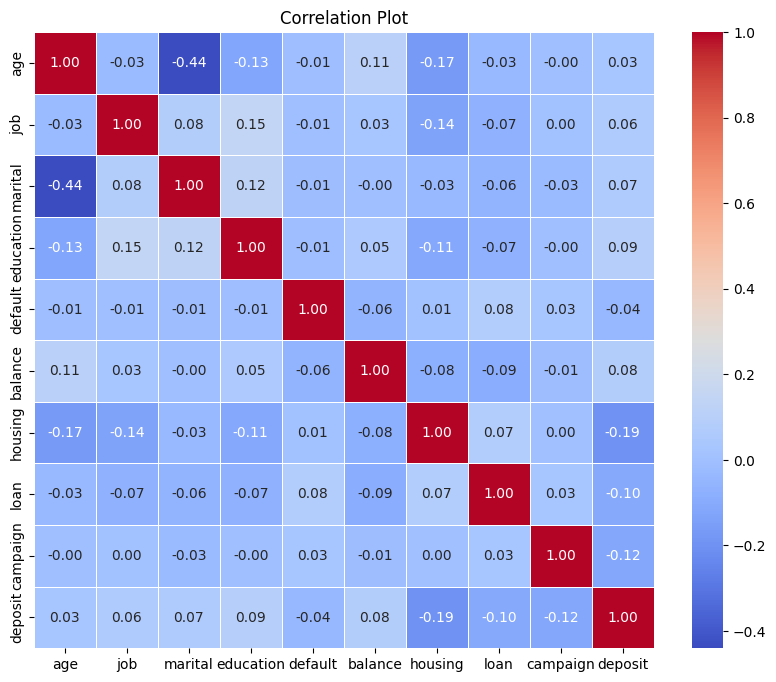

In [74]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [78]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [79]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.47004608294931, 57.83410138248848)

In [80]:
dt2=DecisionTreeClassifier(max_depth=5)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [81]:
dt2.score(x_train,y_train)*100,dt2.score(x_test,y_test)*100

(63.81336405529954, 64.28571428571429)

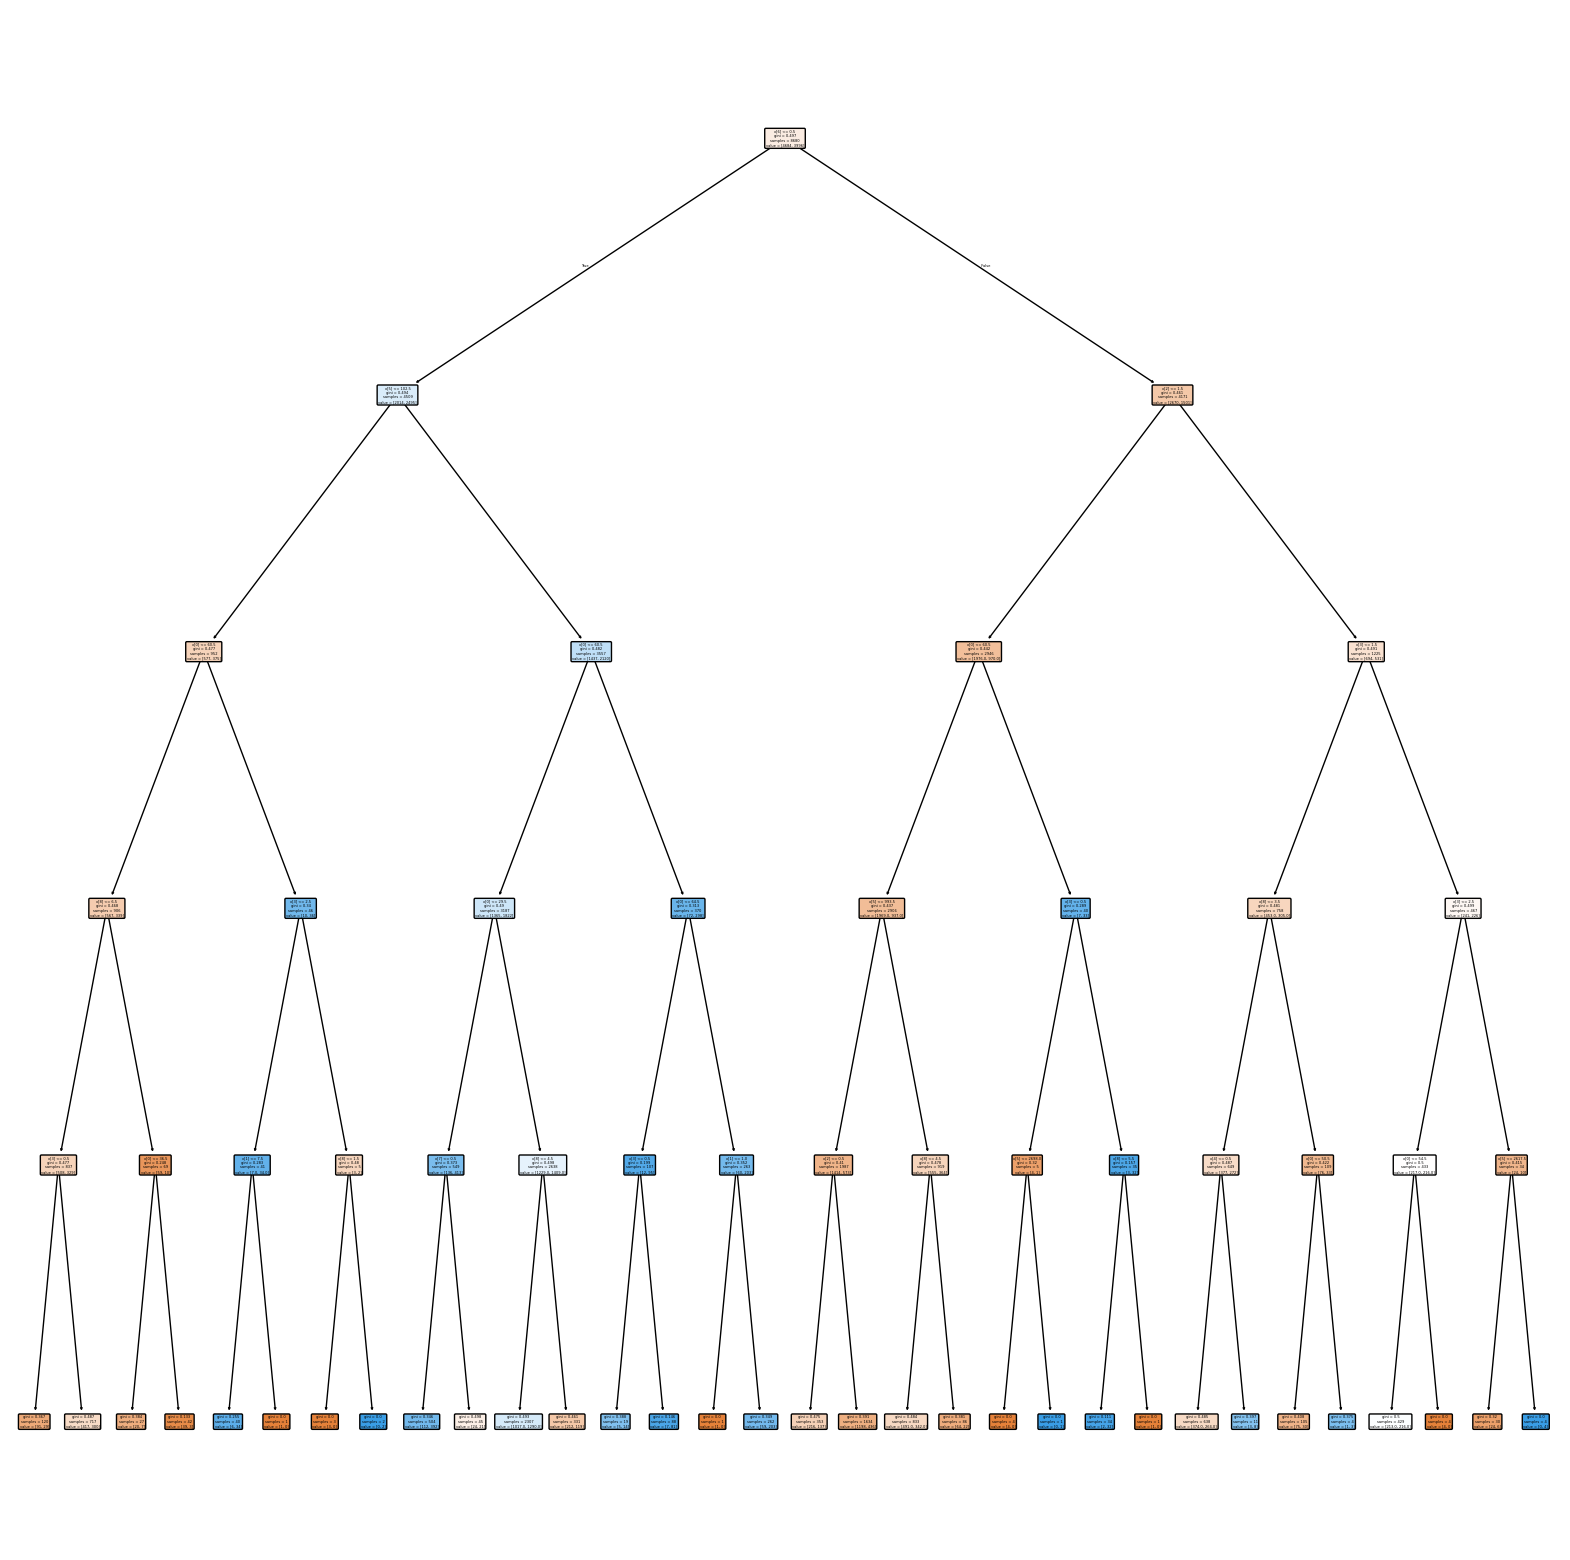

In [82]:
plt.figure(figsize=(20,20))
plot_tree(dt2, filled=True,rounded=True)
plt.show()